# Домашняя работа

## Импорт библиотек

In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist

## Подготовка данных

In [3]:
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
X_train.shape, y_train_labels.shape

((60000, 28, 28), (60000,))

2


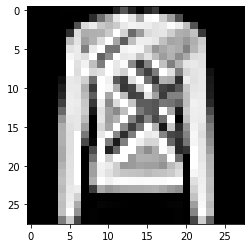

In [5]:
ind = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[ind], cmap='gray')
print(y_train_labels[ind])


<thead>
<tr>
<th align="center">Label</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td align="center">0</td>
<td>T-shirt/top</td>
</tr>
<tr>
<td align="center">1</td>
<td>Trouser</td>
</tr>
<tr>
<td align="center">2</td>
<td>Pullover</td>
</tr>
<tr>
<td align="center">3</td>
<td>Dress</td>
</tr>
<tr>
<td align="center">4</td>
<td>Coat</td>
</tr>
<tr>
<td align="center">5</td>
<td>Sandal</td>
</tr>
<tr>
<td align="center">6</td>
<td>Shirt</td>
</tr>
<tr>
<td align="center">7</td>
<td>Sneaker</td>
</tr>
<tr>
<td align="center">8</td>
<td>Bag</td>
</tr>
<tr>
<td align="center">9</td>
<td>Ankle boot</td>
</tr>
</tbody>


In [6]:
# Нормировка
X_test = X_test / X_train.max()
X_train = X_train / X_train.max()
(X_train.min(), X_train.max()), (X_test.min(), X_test.max()) 

((0.0, 1.0), (0.0, 1.0))

In [7]:
# Вытягивание признаков
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [8]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

y_train[:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# Задание №1

1. Опишите - какой результат нейросети получен в зависимости от:

* числа нейронов в слое (для 2-х слойной сети),
* числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).
* фиксируйте для тренировочного и тестового набора метрики accuracy.



In [9]:
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.vis_utils import plot_model

### Задание 1.1. Опишите - какой результат нейросети получен в зависимости от числа нейронов в слое (для 2-х слойной сети)

In [10]:
import tensorflow as tf
from collections import namedtuple

tf.random.set_seed(42)

accuracy_loss = namedtuple(
  'accuracy_loss', 
  ['accuracy','loss',]
)


neuron_num = [1, 2, 5, 8, 10, 15, 20, 30, 40, 50, 100, 200, 1000, 2000]
output_neuron_num = y_train.shape[1]
test_reserch_result = dict()
train_reserch_result = dict()

for neuron in neuron_num:
  model = Sequential()
  model.add(Dense(neuron, input_shape=(28*28,), activation='relu'))
  model.add(Dense(output_neuron_num, activation='sigmoid'))

  model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

  history = model.fit(X_train, y_train,
                      epochs=5,
                      batch_size=1000,
                      verbose=1,
                      validation_split=0.2)
  
  train_reserch_result[neuron] = accuracy_loss(history.history['accuracy'][-1], history.history['loss'][-1])
  # test_reserch_result[neuron] = accuracy_loss(*model.evaluate(X_test, y_test, batch_size=1000))
  test_reserch_result[neuron] = accuracy_loss(history.history['val_accuracy'][-1], history.history['val_loss'][-1])


Epoch 1/5
48/48 [==============================] - 1s 10ms/step - loss: 2.2955 - accuracy: 0.1155 - val_loss: 2.2776 - val_accuracy: 0.1323
Epoch 2/5
48/48 [==============================] - 0s 7ms/step - loss: 2.2636 - accuracy: 0.1435 - val_loss: 2.2470 - val_accuracy: 0.1505
Epoch 3/5
48/48 [==============================] - 0s 8ms/step - loss: 2.2374 - accuracy: 0.1686 - val_loss: 2.2224 - val_accuracy: 0.1710
Epoch 4/5
48/48 [==============================] - 0s 6ms/step - loss: 2.2140 - accuracy: 0.1664 - val_loss: 2.1984 - val_accuracy: 0.1714
Epoch 5/5
48/48 [==============================] - 0s 6ms/step - loss: 2.1908 - accuracy: 0.1686 - val_loss: 2.1747 - val_accuracy: 0.1730
Epoch 1/5
48/48 [==============================] - 1s 12ms/step - loss: 2.3059 - accuracy: 0.0704 - val_loss: 2.2989 - val_accuracy: 0.0874
Epoch 2/5
48/48 [==============================] - 0s 9ms/step - loss: 2.2908 - accuracy: 0.1076 - val_loss: 2.2707 - val_accuracy: 0.1326
Epoch 3/5
48/48 [========

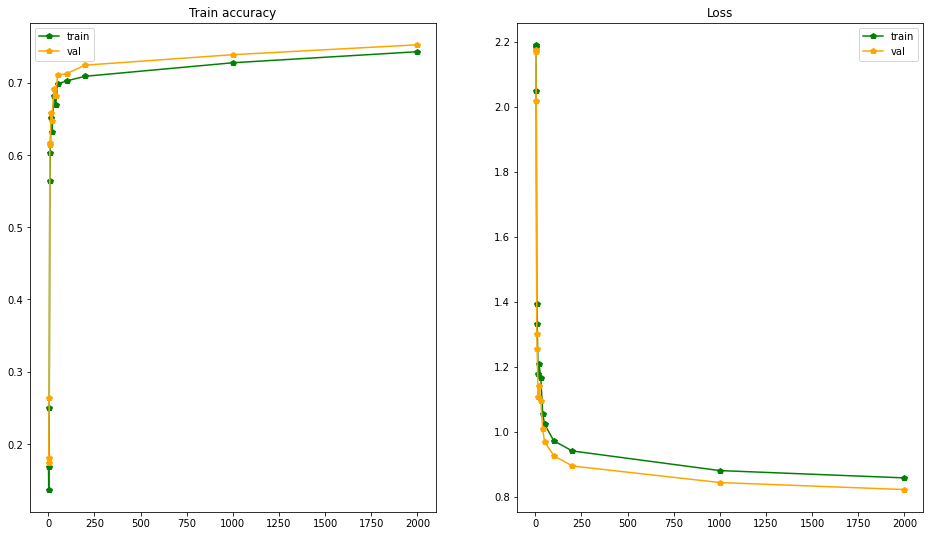

In [11]:
figure, axis = plt.subplots(1, 2, figsize=(16, 9))
  
# # For Sine Function
# .plot(X, Y1)
# axis[0, 0].set_title("Sine Function")

axis[0].plot(neuron_num, 
         [reserch_result.accuracy for reserch_result in train_reserch_result.values()],
         'p-',
         label='train',
         c='g')
axis[0].plot(neuron_num, 
         [reserch_result.accuracy for reserch_result in test_reserch_result.values()],
         'p-',
         label='val',
         c='orange')

axis[1].plot(neuron_num, 
         [reserch_result.loss for reserch_result in train_reserch_result.values()],
         'p-',
         label='train',
         c='g')

axis[1].plot(neuron_num, 
         [reserch_result.loss for reserch_result in test_reserch_result.values()],
         'p-',
         label='val',
         c='orange')

axis[0].set_title('Train accuracy')
axis[0].legend(loc="best")

# axis[1].set_title('Test accuracy')
# axis[1].legend(loc="best")

axis[1].set_title('Loss')
axis[1].legend(loc="best")

plt.show()

**Вывод**: Зависимость accuracy от числа нейронов в сети имеет вид: 
$$\text{const}-e^{-x}$$
т.е. имеет насыщение (при существенном увеличении числа нейронов прирост в точности не значителен). 

Что касается зависимости loss от числа нейронов, то здесь зависимость вида $-e^{-x}$

## Задание 1.2. Опишите - какой результат нейросети получен в зависимости от числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров)

In [12]:
neuron_layers = [2, 3, 5, 10, 20, 30, 40, 50]

In [13]:
def get_neuron_num(layer_number, 
                   total_params=200000, 
                   input_neuron_count = 784,
                   output_neuron_num=10):

  if layer_number < 3:
    return round((total_params - output_neuron_num) / (input_neuron_count + 1 + output_neuron_num))

  c = total_params - output_neuron_num
  b = input_neuron_count + output_neuron_num + 1 + layer_number - 2
  a = layer_number - 2
  return round(np.max([(-b + np.sqrt(b ** 2 + 4 * a * c)) / (2 * a),
            (-b - np.sqrt(b ** 2 + 4 * a * c)) / (2 * a)]))

In [14]:
train_reserch_result, test_reserch_result, models = dict(), dict(), dict()

tf.random.set_seed(42)

for neuron_layer in neuron_layers:
  model = Sequential()

  model.add(Dense(get_neuron_num(neuron_layer), input_shape=(28 * 28,), activation='relu'))
  [model.add(Dense(get_neuron_num(neuron_layer))) for _ in range(neuron_layer - neuron_layers[0])]
  model.add(Dense(output_neuron_num, activation='sigmoid'))

  models[neuron_layer] = model
  model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

  history = model.fit(X_train, y_train,
                      epochs=5,
                      batch_size=1000,
                      verbose=0,
                      validation_split=0.2)
  
  train_reserch_result[neuron_layer] = accuracy_loss(history.history['accuracy'][-1], history.history['loss'][-1])
  test_reserch_result[neuron_layer] = accuracy_loss(history.history['val_accuracy'][-1], history.history['val_loss'][-1])
  
  

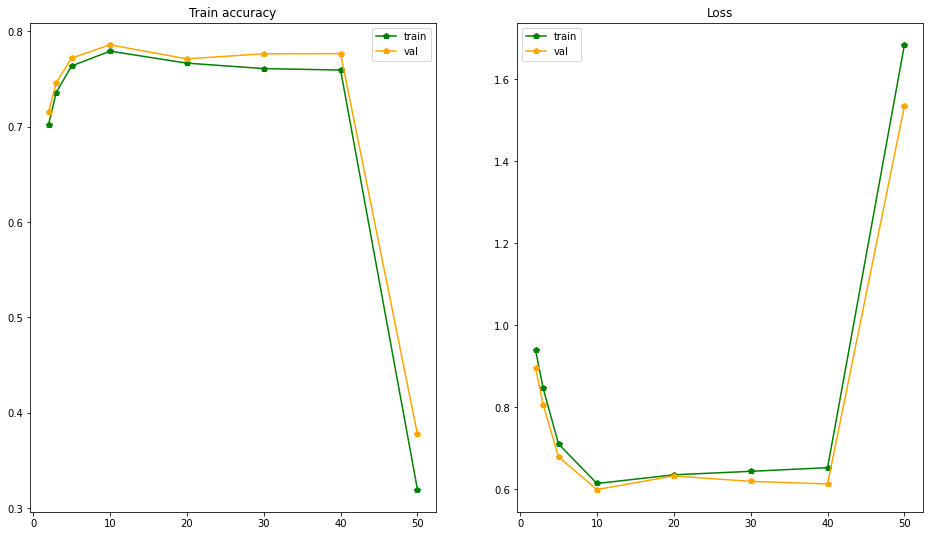

In [15]:
figure, axis = plt.subplots(1, 2, figsize=(16, 9))
  
axis[0].plot(neuron_layers, 
         [reserch_result.accuracy for reserch_result in train_reserch_result.values()],
         'p-',
         label='train',
         c='g')
axis[0].plot(neuron_layers, 
         [reserch_result.accuracy for reserch_result in test_reserch_result.values()],
         'p-',
         label='val',
         c='orange')

axis[1].plot(neuron_layers, 
         [reserch_result.loss for reserch_result in train_reserch_result.values()],
         'p-',
         label='train',
         c='g')

axis[1].plot(neuron_layers, 
         [reserch_result.loss for reserch_result in test_reserch_result.values()],
         'p-',
         label='val',
         c='orange')

axis[0].set_title('Train accuracy')
axis[0].legend(loc="best")

# axis[1].set_title('Test accuracy')
# axis[1].legend(loc="best")

axis[1].set_title('Loss')
axis[1].legend(loc="best")

plt.show()

**Вывод**: Зависимость точности от количества слоев нелинейная, а имеет зависимость вида $-x^2$. Таким образом у данной зависимости есть максимум, который и нужно найти

# Задание № 2. Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

In [16]:
models[10].save_weights('model_weights.h5')

Epoch 1/4
60/60 [==============================] - 3s 37ms/step - loss: 0.5777 - accuracy: 0.7944 - val_loss: 0.5727 - val_accuracy: 0.7957
Epoch 2/4
60/60 [==============================] - 2s 36ms/step - loss: 0.5538 - accuracy: 0.8023 - val_loss: 0.5616 - val_accuracy: 0.7969
Epoch 3/4
60/60 [==============================] - 2s 36ms/step - loss: 0.5366 - accuracy: 0.8095 - val_loss: 0.5977 - val_accuracy: 0.7727
Epoch 4/4
60/60 [==============================] - 2s 36ms/step - loss: 0.5253 - accuracy: 0.8122 - val_loss: 0.5441 - val_accuracy: 0.8046
Epoch 1/4
60/60 [==============================] - 3s 36ms/step - loss: 0.6651 - accuracy: 0.7733 - val_loss: 0.5008 - val_accuracy: 0.8189
Epoch 2/4
60/60 [==============================] - 2s 35ms/step - loss: 0.4465 - accuracy: 0.8404 - val_loss: 0.4519 - val_accuracy: 0.8400
Epoch 3/4
60/60 [==============================] - 2s 36ms/step - loss: 0.3914 - accuracy: 0.8601 - val_loss: 0.4268 - val_accuracy: 0.8447
Epoch 4/4
60/60 [===

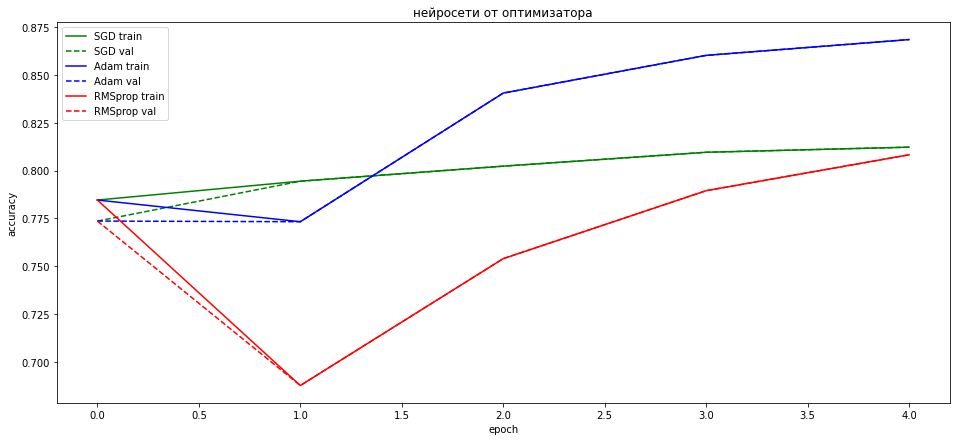

In [17]:
fitted_models = dict()

plt.figure(figsize=(16, 7))
colors = ['g', 'b', 'r']

num_epochs = 4
batch_size = 1000

epoch = np.arange(num_epochs+1)

for i, i_opti in enumerate([keras.optimizers.gradient_descent_v2.SGD(),
                            keras.optimizers.adam_v2.Adam(),
                            keras.optimizers.rmsprop_v2.RMSProp()]):
  
  model = models[10]

  # model.from_config(models[30].get_config())
  
  model.load_weights('model_weights.h5')

  model.compile(optimizer=i_opti,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  
  h0_train = model.evaluate(X_train, y_train, verbose=0)
  h0_val = model.evaluate(X_test, y_test, verbose=0)

  history = model.fit(X_train, y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    verbose=1)
  
  fitted_models[model.optimizer.get_config()['name']] = model  

  # картинки
  plt.plot(epoch, [h0_train[1]] + history.history['accuracy'],
            '-', c=colors[i],
            label=model.optimizer.get_config()['name'] + ' train')
  plt.plot(epoch, [h0_val[1]] + history.history['accuracy'],
            '--', c=colors[i],
            label=model.optimizer.get_config()['name'] + ' val')
  print('=' * 20)

plt.legend()
plt.title('нейросети от оптимизатора')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


# Задание 3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

Итак улучшить метрику на тесте нам помогло: увеличение количества слоев, и выбор оптимизатора Adam. Увеличение количества нейронов в сети выше 250 существенного прироста в метрике не даст

# Задание 4. Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

Confusion matrix

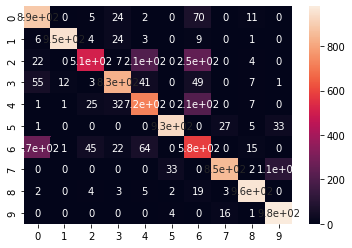

In [19]:
best_model = fitted_models['Adam']

sns.heatmap(
  confusion_matrix(
    y_true=y_test_labels, 
    y_pred=np.argmax(best_model.predict(X_test, verbose=0), axis=1)), 
  annot=True);

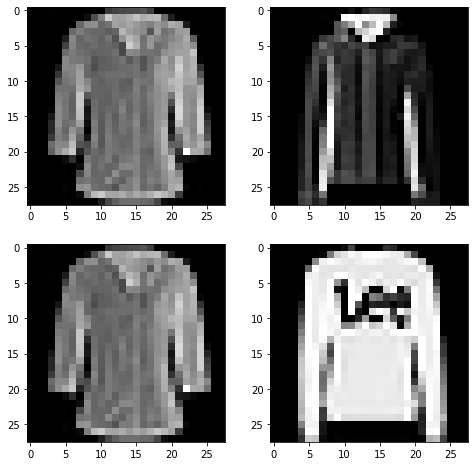

In [67]:
figure, axis = plt.subplots(2, 2, figsize=(8, 8))

axis[0,0].imshow(X_test.reshape(-1, 28, 28)[int(np.argwhere(y_test_labels == 6)[0])] * 255, cmap='gray')
axis[0,1].imshow(X_test.reshape(-1, 28, 28)[int(np.argwhere(y_test_labels == 4)[0])] * 255, cmap='gray')

axis[1,0].imshow(X_test.reshape(-1, 28, 28)[int(np.argwhere(y_test_labels == 6)[0])] * 255, cmap='gray')
axis[1,1].imshow(X_test.reshape(-1, 28, 28)[int(np.argwhere(y_test_labels == 2)[0])] * 255, cmap='gray')
# plt.imshow(X_test.reshape(-1, 28, 28)[int(np.argwhere(y_test_labels == 0)[0])] * 255, cmap='gray')

Precision and Recall

In [46]:
a = np.array([1, 2, 3])
(a == 1).astype(int)

array([1, 0, 0])

In [65]:
from sklearn.metrics import precision_score, recall_score
import pandas as pd

pd.DataFrame(
    data=[
      [label,
       precision_score(y_true=(y_test_labels == label).astype(int), 
                  y_pred=(np.argmax(best_model.predict(X_test, verbose=0), axis=1) == label).astype(int)),
  
      recall_score(y_true=(y_test_labels == label).astype(int), 
                  y_pred=(np.argmax(best_model.predict(X_test, verbose=0), axis=1) == label).astype(int))] for label in range(0, 10)],
    index=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
    columns=['label', 'precision', 'recall']
)

,label,precision,recall
T-shirt/top,0,0.714401,0.888
Trouser,1,0.985522,0.953
Pullover,2,0.856187,0.512
Dress,3,0.881356,0.832
Coat,4,0.691571,0.722
Sandal,5,0.959918,0.934
Shirt,6,0.490772,0.585
Sneaker,7,0.948832,0.853
Bag,8,0.947783,0.962
Ankle boot,9,0.870222,0.979
